In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, ZeroPadding2D, BatchNormalization, Activation, Add, Input, Dropout, GlobalAveragePooling2D

Number of images of Apple___Apple_scab: 2016 || Number of images of Apple___Black_rot: 1987 || Number of images of Apple___Cedar_apple_rust: 1760 || Number of images of Apple___healthy: 2008 || Number of images of Blueberry___healthy: 1816 || Number of images of Cherry_(including_sour)___healthy: 1826 || Number of images of Cherry_(including_sour)___Powdery_mildew: 1683 || Number of images of Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 || Number of images of Corn_(maize)___Common_rust_: 1907 || Number of images of Corn_(maize)___healthy: 1859 || Number of images of Corn_(maize)___Northern_Leaf_Blight: 1908 || Number of images of Grape___Black_rot: 1888 || Number of images of Grape___Esca_(Black_Measles): 1920 || Number of images of Grape___healthy: 1692 || Number of images of Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 || Number of images of Orange___Haunglongbing_(Citrus_greening): 2010 || Number of images of Peach___Bacterial_spot: 1838 || Number of images of Peach_

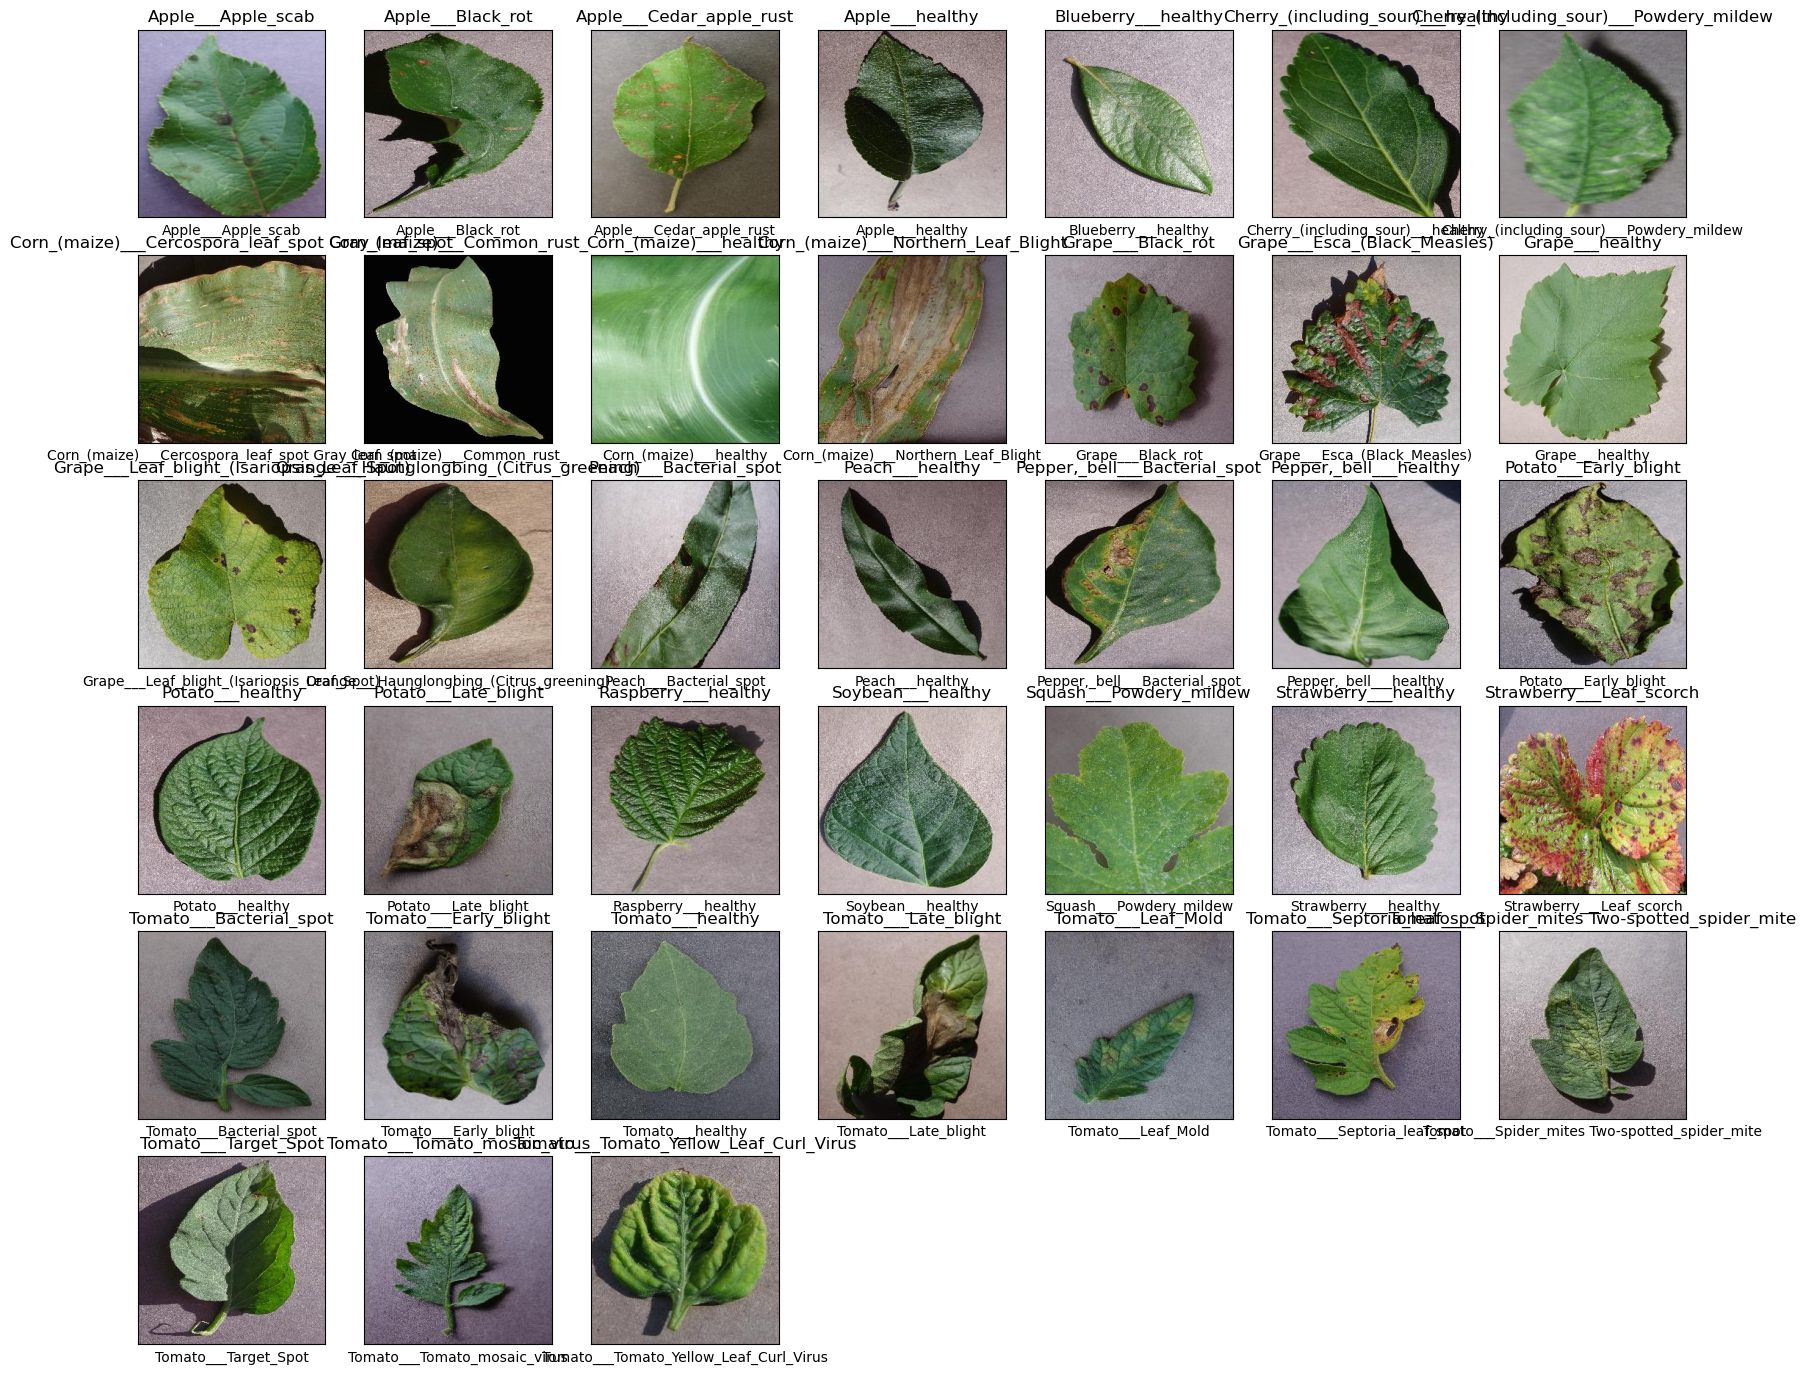

In [2]:
import os
import matplotlib.pyplot as plt

path = r"C:\Users\Gauri Gupta\Desktop\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
plt.figure(figsize=(20, 20))  # Adjusted figure size
count = 0
plant_names = []
total_images = 0

# Loop through directories and files
for i in os.listdir(path):
    subpath = os.path.join(path, i)
    
    # Check if it's a directory
    if os.path.isdir(subpath):
        count += 1
        plant_names.append(i)
        plt.subplot(7, 7, count)
        
        images_path = os.listdir(subpath)
        
        # Skip empty directories
        if len(images_path) == 0:
            continue

        print("Number of images of " + i + ":", len(images_path), "||", end=" ")
        total_images += len(images_path)

        try:
            image_show = plt.imread(os.path.join(subpath, images_path[0]))
            plt.imshow(image_show)
            plt.xlabel(i)
            plt.title(i)  # Added subplot title
            plt.xticks([])
            plt.yticks([])
        except Exception as e:
            print(f"Error loading image: {e}")

print("Total number of images we have:", total_images)


In [3]:
print(plant_names)
print(len(plant_names))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [4]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [5]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [6]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [7]:
base_model = ResNet50()

headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

model = Model(inputs=base_model.input, outputs=headModel)

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1[0][0]']         

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the base ResNet50 model (pre-trained on ImageNet) without the top layers
base_model_tf = ResNet50(include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
base_model_tf.trainable = False

# Define the input tensor
pt = Input(shape=(224, 224, 3))

# Apply preprocessing to the input
x = preprocess_input(pt)

# Pass the preprocessed input through the base model (with trainable=False)
model_resnet = base_model_tf(x, training=False)

# Add Global Average Pooling and classification layers
model_resnet = GlobalAveragePooling2D()(model_resnet)
model_resnet = Dense(128, activation='relu')(model_resnet)
model_resnet = Dense(64, activation='relu')(model_resnet)
model_resnet = Dense(38, activation='softmax')(model_resnet)

# Create the final model
model_main = Model(inputs=pt, outputs=model_resnet)

# Print the model summary
model_main.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                           

In [9]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train=r'C:\Users\Gauri Gupta\Desktop\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'

path_valid=r'C:\Users\Gauri Gupta\Desktop\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [11]:
model_main = Model(inputs=pt, outputs=model_resnet)

# Compile the model
model_main.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_main.summary()

checkpoint_dir = r"C:\Users\Gauri Gupta\Desktop\plant directory"

# Create a ModelCheckpoint callback with the new directory
mc = ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'model_checkpoint.h5'), 
                     monitor='val_accuracy', save_best_only=True)
# Training
model_main.fit(train, validation_data=valid, epochs=30, steps_per_epoch=200, verbose=1, callbacks=[mc, es, lr])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                          

C:\Users\Gauri Gupta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 1319s 7s/step - loss: 1.5332 - accuracy: 0.5902 - val_loss: 0.5849 - val_accuracy: 0.8234 - lr: 0.0010
Epoch 2/30
200/200 [==============================] - 1160s 6s/step - loss: 0.4736 - accuracy: 0.8608 - val_loss: 0.3373 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 3/30
200/200 [==============================] - 1082s 5s/step - loss: 0.3249 - accuracy: 0.9062 - val_loss: 0.3397 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 4/30
200/200 [==============================] - 1055s 5s/step - loss: 0.2755 - accuracy: 0.9127 - val_loss: 0.2988 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 5/30
200/200 [==============================] - 1189s 6s/step - loss: 0.2492 - accuracy: 0.9217 - val_loss: 0.2285 - val_accuracy: 0.9227 - lr: 0.0010
Epoch 6/30
200/200 [==============================] - 1144s 6s/step - loss: 0.2172 - accuracy: 0.9323 - val_loss: 0.1921 - val_accuracy: 0.9387 - lr: 0.0010
Epoch 7/30
200/200 [==============================] - 958s 5s/step - 

In [12]:
model_main.save("RESNET50_PLANT_DISEASE.h5")

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

Text(0.5, 1.0, 'loss')

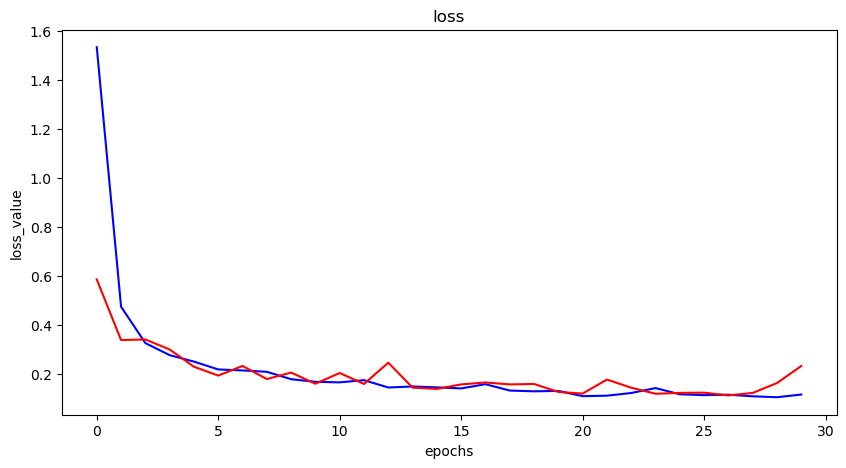

In [14]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['loss'],color='b',label='Training loss')
plt.plot(model_main.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")

Text(0.5, 1.0, 'accuracy graph')

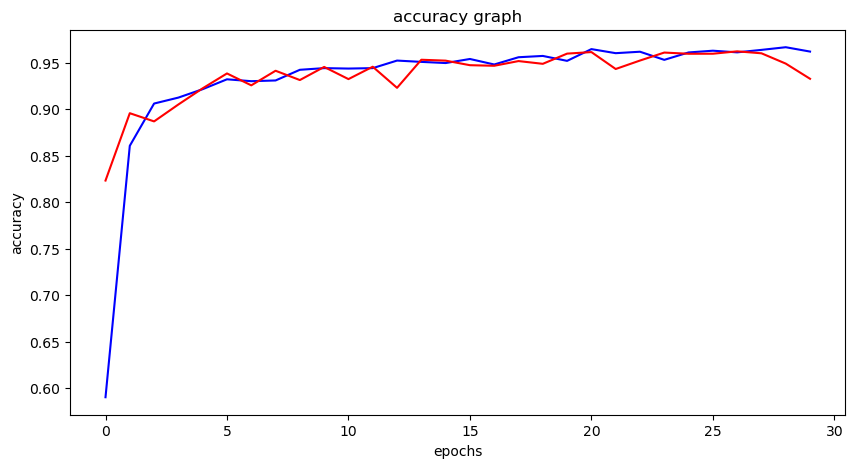

In [15]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")

Following is our prediction:
1/1 [==============================] - 0s 100ms/step


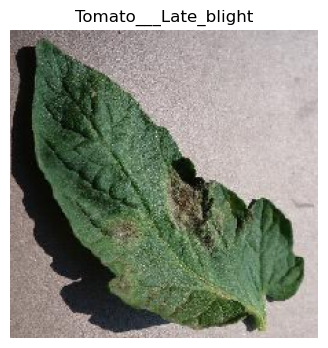

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = r"C:\Users\Gauri Gupta\Desktop\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Tomato___Late_blight\0a39aa48-3f94-4696-9e43-ff4a93529dc3___RS_Late.B 5103_flipLR.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img / 255

print("Following is our prediction:")
prediction = model_main.predict(img)

class_names = valid.class_indices
predicted_class_idx = np.argmax(prediction)
predicted_class = list(class_names.keys())[list(class_names.values()).index(predicted_class_idx)]

plt.figure(figsize=(4, 4))
plt.imshow(new_img)
plt.axis('off')
plt.title(predicted_class)
plt.show()

550/550 [==============================] - 918s 2s/step
Confusion Matrix:
[[14 14 10 ... 13 16 28]
 [12 13 19 ...  6  6 24]
 [ 8 10 11 ... 11 18 20]
 ...
 [11 18 11 ... 15  9 26]
 [14 14 10 ...  9 13 23]
 [15 15  6 ...  6 10 22]]


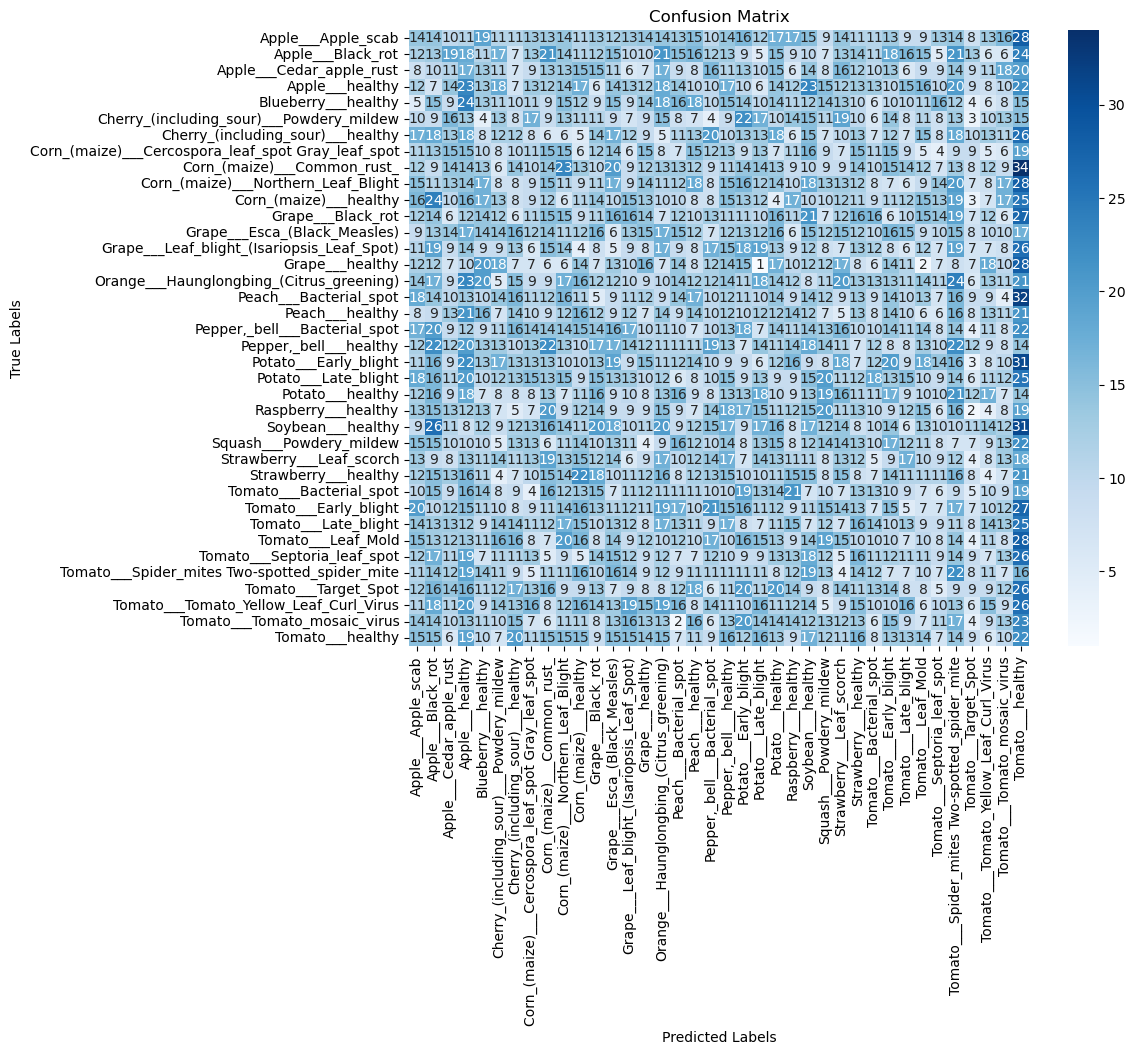

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_true = valid.classes
y_pred_probs = model_main.predict(valid)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Get the class names
class_names = list(train.class_indices.keys())

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()